In [1]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
#using death.json file
def lives_vs_daysSurvived(fileName, team):
  if not isinstance(team,str):
    print("Error: Team variable should be a string!")

  dataFrame = pd.read_json(fileName, lines = True)
  teamData = dataFrame[dataFrame["agent_type"].str.contains(team)] #extract data for a certain team
  ages = teamData["ageUponDeath"].values #convert into numpy
  #ages = teamData["Age"].values #convert into numpy
  deaths = np.arange(len(ages)) + 1
  return deaths, ages 

#using .csv file
def cumulativeRewards(fileName):
  data = pd.read_csv(fileName).to_numpy()
  day = np.arange(data.size) + 1
  return day, data

#using the 'foodtaken_vs_hp.csv' file
#output the foodtaken distribution vs hp to a .csv file
def foodtakenDistributionVsHp(fileName, actionLevels, interval):
  data = pd.read_csv(fileName).to_numpy()
  distribution = {}
  foodtaken = data[:,0]
  hp = data[:,1]
  table = []
  
  for element in hp:
    distribution[element] = np.zeros(actionLevels)

  for element in data:
    position = int(element[0]/interval)
    distribution[element[1]][position] += 1

  for key in distribution:
      column = distribution[key]
      column = np.insert(column,0, key)
      table.append(column)

  np.savetxt("food_distribution_vs_hp.csv", table, delimiter=',')
  
#using death.json file
def days_vs_deathPerDay(fileName, simulation_days):
  dataFrame = pd.read_json(fileName, lines = True)
  day = np.arange(simulation_days) + 1
  deathPerDay = np.zeros(simulation_days)

  value_count = dataFrame["ageUponDeath"].value_counts()
  for n in range(simulation_days):
    if n+1 in value_count:
      deathPerDay[n] = value_count[n+1]
  
  return day, deathPerDay

6


Text(0.5, 1.0, 'Deaths vs Days lived')

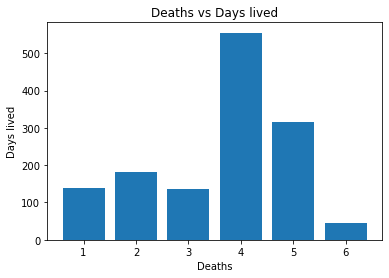

In [18]:
#plot lives vs days lived
fileName = "logs/2022-01-10-21-47-51/death.json"
team = "Team6"
lives, days_survived = lives_vs_daysSurvived(fileName, team)
print(len(lives))

plt.bar(lives, days_survived, tick_label = lives)
plt.xlabel("Deaths")
plt.ylabel("Days lived")
plt.title("Death number vs Days lived")

In [ ]:
#Days vs death per day
day, deathPerDay = days_vs_deathPerDay(fileName, 10000)
#x = day[range(0,200,10)]
#y = deathPerDay[range(0,200,10)]

plt.bar(day,deathPerDay)
plt.xlabel("Days")
plt.ylabel("Death Per Day")
plt.title("Days vs Death per day")

# Read from .csv

Text(0.5, 1.0, 'hp vs days')

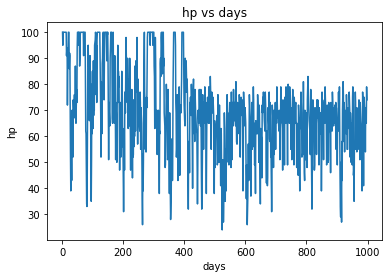

In [15]:
#hp vs days
fileName = "HP_by_days_dc2870bd-3431-48c1-bb76-912d30e09074.csv"
hp = pd.read_csv(fileName).to_numpy()
days = np.arange(hp.size)+1
plt.plot(days, hp)
plt.xlabel("days")
plt.ylabel("hp")
plt.title("hp vs days")



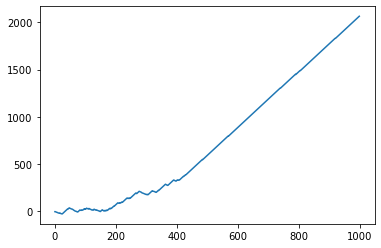

In [20]:
#cumulative rewards
fileName = "cumulative_rewards_dc2870bd-3431-48c1-bb76-912d30e09074.csv"
day, data = cumulativeRewards(fileName)
#print(day)
#print(data)
plt.plot(day,data)

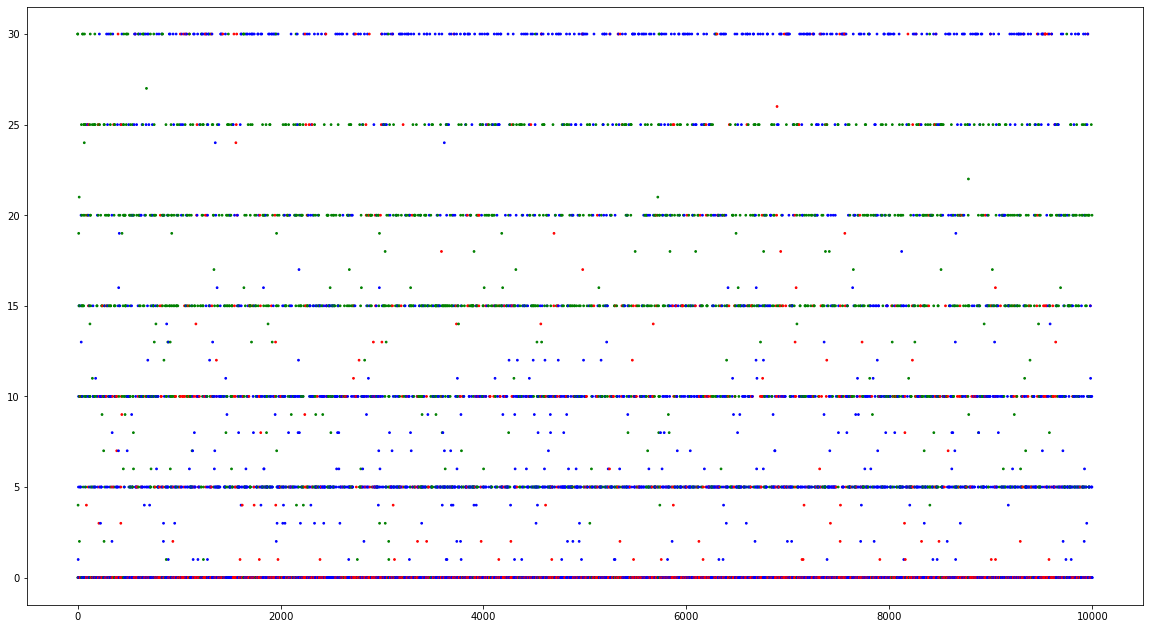

In [13]:
# FoodEaten vs days (hp sorted with three levels)
#use the 'foodtaken_vs_hp.csv' file
import csv

with open('log_plot/2022-01-11-20-21-11_A1_R2_W15_10000/foodtaken_vs_hp_bd6fb28c-2802-44e6-8b2d-d2da4624c024.csv', newline='') as f:
    reader = csv.reader(f)
    foodAndHp = list(reader)

days = list(range(1, len(foodAndHp)+1))
foodEaten = [float(x[0]) for x in foodAndHp]
Hp = [float(x[1]) for x in foodAndHp]

def sortHpNumber(n):
    if n < 34:
        return 0
    elif n < 67:
        return 1
    else:
        return 2
HpSortedNumber = list(map(sortHpNumber,Hp))

#plt.scatter(days, foodEaten,s=10,c=HpSorted,cmap='Greens')
#plt.scatter(days, foodEaten,s=10,c=HpSorted,cmap='PuBuGn')
"""
colors=["#0000FF", "#00FF00", "#FF0066"]
for i in range(len(days)):
    plt.scatter(days[i], foodEaten[i], color=colors[HpSorted[i]])
"""
def sortHp(n):
    if n < 34:
        return "red"
    elif n < 67:
        return "blue"
    else:
        return "green"
sequence_of_colors = list(map(sortHp,Hp))
plt.figure(figsize=(20, 11))
plt.scatter(days, foodEaten,s=3,c=sequence_of_colors)

#left, right = 1,5000        # return the current xlim
#plt.xlim((left, right))     # set the xlim to left, right

plt.show()

#export to .csv file to plot the histogram
tableN = []
tableN.append(days)
tableN.append(foodEaten)
tableN.append(HpSortedNumber)
TransposeData = pd.DataFrame(data=tableN)
TransposeData1 = TransposeData.T
np.savetxt("foodEatenVSdays.csv", TransposeData1, delimiter=',')

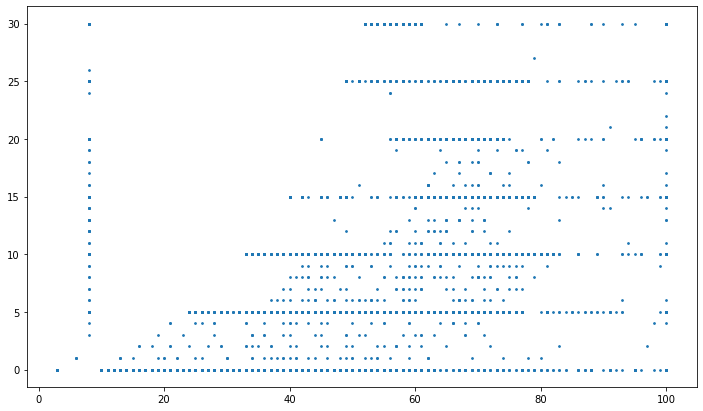

In [12]:
# foodEaten vs hp 
import csv

with open('log_plot/2022-01-11-20-21-11_A1_R2_W15_10000/foodtaken_vs_hp_bd6fb28c-2802-44e6-8b2d-d2da4624c024.csv', newline='') as f:
    reader = csv.reader(f)
    foodAndHp = list(reader)

days = list(range(1, len(foodAndHp)+1))
foodEaten = [float(x[0]) for x in foodAndHp]
Hp = [float(x[1]) for x in foodAndHp]

plt.figure(figsize=(12, 7))
plt.scatter(Hp, foodEaten,s=3)

#left, right = 1,100        # return the current xlim
#plt.xlim((left, right))     # set the xlim to left, right

plt.show()

In [4]:
# foodtakenDistributionVsHp
#use the 'foodtaken_vs_hp.csv' file
#the output is another csv file
fileName = "log_plot/2022-01-11-19-29-21_A1_R0_10000/foodtaken_vs_hp_ab3b859c-f81c-4f88-b06b-214ef941298a.csv"
foodtakenDistributionVsHp(fileName, 7, 5)

# Read from json

In [8]:
# Use death instead
td = pd.read_json("log_plot/2022-01-11-20-21-11_A1_R2_W15_10000/death.json", lines = True)

print(td.columns)

Index(['ageUponDeath', 'agent_type', 'cumulativeDeaths', 'day', 'level', 'msg',
       'tick', 'time'],
      dtype='object')


,agent_type,ageUponDeath
71,Team5,203
1654,Team2,2209
2318,Team3,869
2396,Team6,184
3215,Team7,667
3457,RandomAgent,7680
3538,Team1Agent1,7849
4272,Team4,391
4503,Team1Agent2,4638


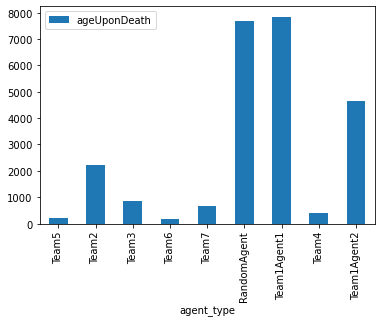

In [11]:
# max survive days over each agent
t_all = td
plotdata = pd.DataFrame(t_all, columns = ['agent_type','ageUponDeath'])
idx = plotdata.groupby(['agent_type'])['ageUponDeath'].transform(max) == plotdata['ageUponDeath']
PD = plotdata[idx]
PD.plot(x='agent_type',kind='bar')
PD

<AxesSubplot:xlabel='agent_type'>

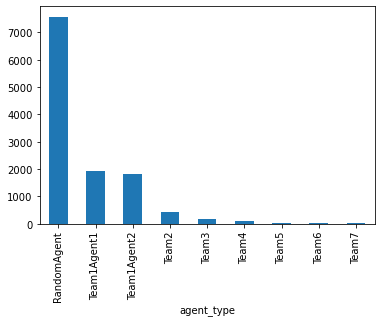

In [10]:
# mean day survive per agent
t_all = td
plotdata = pd.DataFrame(t_all, columns = ['agent_type','ageUponDeath'])
A_sorted = plotdata.sort_values(["agent_type"], ascending=True)
A_sorted = A_sorted.groupby(['agent_type'])['ageUponDeath'].mean()
#PD = plotdata[idx]
#plotdata
A_sorted.plot(x='agent_type',kind='bar')